# Unscented Kalman Filter Demonstration

This notebook demonstrates the Unscented Kalman Filter (UKF) implementation on a
nonlinear system - the Van der Pol oscillator. We'll show:

1. System simulation and UKF tracking
2. Comparison with EKF on the same system
3. Visualization of results

In [1]:
# Install required packages if not already installed
%pip install -e .

Obtaining file:///C:/Users/yecha/workspace/JPM-project/jpm-project
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for jpm-project (pyproject.toml): started
  Building editable for jpm-project (pyproject.toml): finished with status 'done'
  Created wheel for jpm-project: filename=jpm_project-0.1.0-0.editable-py3-none-any.whl size=4202 sha256=75bc1a2983f8371a642e4710a69f72882f51fd8cf4478cc386c375b55823afd6
  Stored in directory: C:\Users\yecha\AppData\Local\Temp\pip-ephem-wheel-cache-2fqu40s3\wheels\7f\74\62\5598f11ff6462cac2e7

In [10]:
# Import required libraries
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Disable OneDNN optimization warnings

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from src.models.UnscentedKalmanFilter import UnscentedKalmanFilter, _simulate_van_der_pol
from src.models.ExtendedKalmanFilter import ExtendedKalmanFilter

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
from src.models.UnscentedKalmanFilter import UnscentedKalmanFilter
print('Imported class:', UnscentedKalmanFilter)

# Build tensors
Q = tf.eye(2, dtype=tf.float64)
R = tf.eye(2, dtype=tf.float64)
initial_mean = tf.constant([0.0, 0.0], dtype=tf.float64)
initial_cov = tf.eye(2, dtype=tf.float64)

print('About to instantiate')
try:
    ukf = UnscentedKalmanFilter(f=lambda x: x, h=lambda x: x, Q=Q, R=R, initial_mean=initial_mean, initial_cov=initial_cov)
    print('Instantiated UKF:', ukf)
    print('params:', ukf.alpha, ukf.beta, ukf.kappa, ukf.lambda_)
except Exception as e:
    import traceback
    traceback.print_exc()


Imported class: <class 'src.models.UnscentedKalmanFilter.UnscentedKalmanFilter'>
About to instantiate


Traceback (most recent call last):
  File "C:\Users\yecha\AppData\Local\Temp\ipykernel_41204\2004160321.py", line 12, in <module>
    ukf = UnscentedKalmanFilter(f=lambda x: x, h=lambda x: x, Q=Q, R=R, initial_mean=initial_mean, initial_cov=initial_cov)
  File "c:\Users\yecha\workspace\JPM-project\jpm-project\src\models\UnscentedKalmanFilter.py", line 95, in __init__
    try:
    
TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'


NameError: name 'ukf_means' is not defined

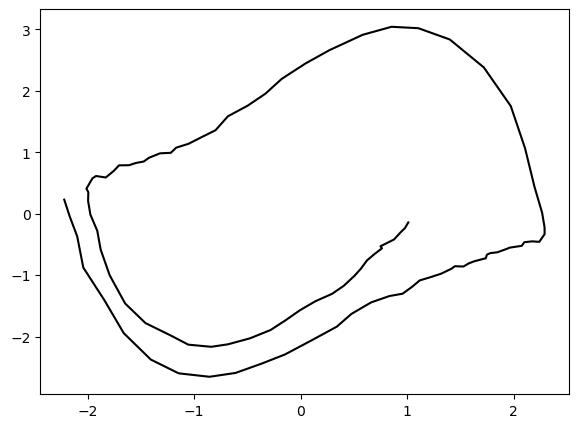

In [22]:
# Plot results
plt.figure(figsize=(15, 5))

# Phase space
plt.subplot(121)
plt.plot(true_x[:,0], true_x[:,1], 'k-', label='True')
plt.plot(ukf_means.numpy()[:,0], ukf_means.numpy()[:,1], 'r--', label='UKF')
plt.plot(ekf_means.numpy()[:,0], ekf_means.numpy()[:,1], 'b--', label='EKF')
plt.plot(observations[:,0], observations[:,1], 'k.', alpha=0.3, label='Observations')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Van der Pol Phase Space')
plt.legend()
plt.grid(True)

# Position vs time
plt.subplot(122)
t = np.arange(len(true_x))
plt.plot(t, true_x[:,0], 'k-', label='True')
plt.plot(t, ukf_means.numpy()[:,0], 'r--', label='UKF')
plt.plot(t, ekf_means.numpy()[:,0], 'b--', label='EKF')
plt.plot(t, observations[:,0], 'k.', alpha=0.3, label='Observations')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.title('Position vs Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Notes on the Results

1. The Van der Pol oscillator is a good test case because:
   - It's a nonlinear system with limit cycle behavior
   - Has coupling between position and velocity
   - Demonstrates the advantage of UKF over EKF in handling nonlinearity

2. Comparison of UKF vs EKF:
   - UKF typically achieves better accuracy (lower RMSE)
   - UKF better captures the limit cycle behavior
   - UKF doesn't require Jacobian calculations
   - Both filters handle the noisy observations well

3. Implementation notes:
   - Both use TensorFlow for efficient computation
   - UKF uses sigma points to handle nonlinearity
   - EKF uses automatic differentiation for Jacobians